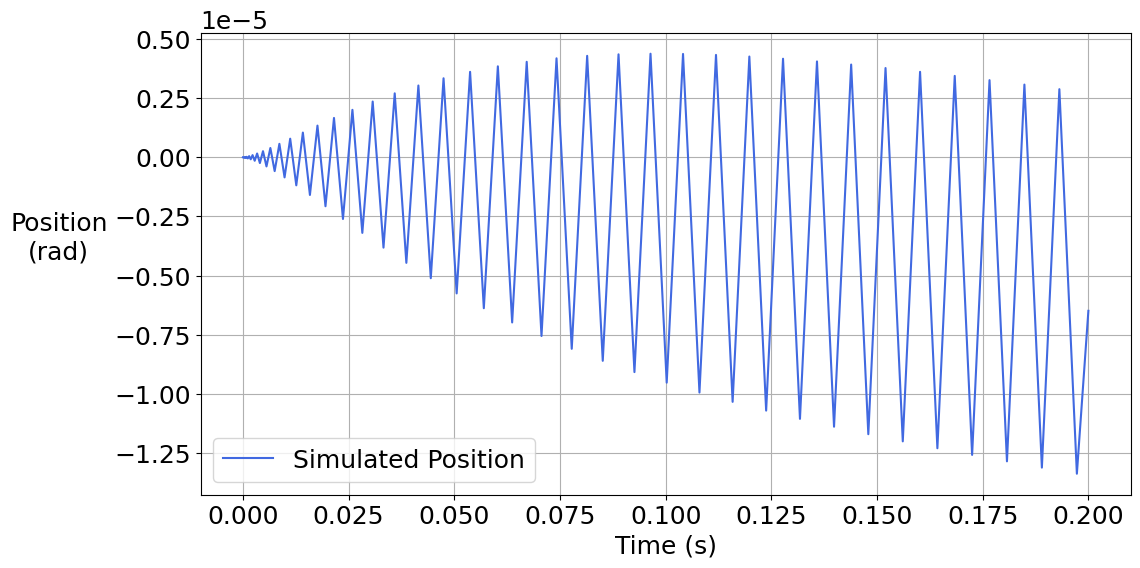

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
# Set the font size globally
mpl.rcParams.update({'font.size': 18})  # Change 14 to your desired font size

# Read the data from the CSV file
data = pd.read_csv('data/validation_exp/nonsmooth/tanh.csv')
data = pd.read_csv('data/validation_exp/nonsmooth/sign.csv')
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(data['time'], data['pos_sim'], label='Simulated Position', color='royalblue', linestyle='-', markersize=4)

# Highlighting a specific region, if necessary (you might need to adjust these values)
# plt.axvline(x=special_time, color='red', linestyle='--', label='Critical Point')

# Adding labels and title
plt.xlabel('Time (s)')
plt.ylabel('Position\n(rad)', labelpad=40, rotation=0)
# plt.title('Simulation of Non-Smooth Dynamics: Position Over Time')

# Adding grid
plt.grid(True)

# Adding annotations, adjust as necessary
# plt.annotate('Start of oscillation', xy=(time_of_oscillation, position_at_oscillation), xytext=(time_of_oscillation+0.5, position_at_oscillation+0.1),
#              arrowprops=dict(facecolor='black', shrink=0.05))

# Enhance legend
plt.legend()

# Show the plot
plt.show()


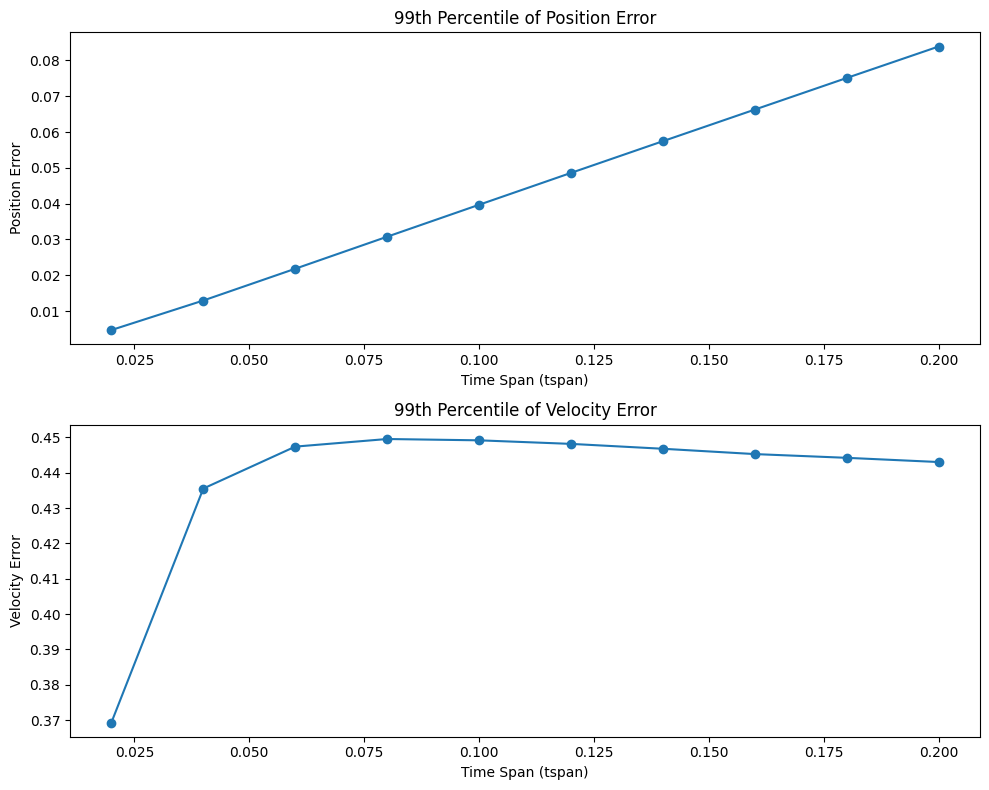

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval

# Load your CSV data
df = pd.read_csv('linear2.csv')

# Convert string representations of lists and tuples into actual lists/tuples
df['init_state'] = df['init_state'].apply(literal_eval)
df['lin_state'] = df['lin_state'].apply(literal_eval)
df['nl_state'] = df['nl_state'].apply(lambda x: literal_eval(x.replace('(', '[').replace(')', ']')))

# Calculate error between nl_state and lin_state for position and velocity
df['position_error'] = df.apply(lambda row: abs(row['nl_state'][0] - row['lin_state'][0]), axis=1)
df['velocity_error'] = df.apply(lambda row: abs(row['nl_state'][1] - row['lin_state'][1]), axis=1)

# Group by tspan and calculate the 99th percentile of errors
error_summary = df.groupby('tspan').agg({
    'position_error': lambda x: np.percentile(x, 99),
    'velocity_error': lambda x: np.percentile(x, 99)
}).reset_index()

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Position Error Plot
ax[0].plot(error_summary['tspan'], error_summary['position_error'], marker='o', linestyle='-')
ax[0].set_title('99th Percentile of Position Error')
ax[0].set_xlabel('Time Span (tspan)')
ax[0].set_ylabel('Position Error')

# Velocity Error Plot
ax[1].plot(error_summary['tspan'], error_summary['velocity_error'], marker='o', linestyle='-')
ax[1].set_title('99th Percentile of Velocity Error')
ax[1].set_xlabel('Time Span (tspan)')
ax[1].set_ylabel('Velocity Error')

plt.tight_layout()
plt.show()


/var/folders/3b/gndgh3_j0mn3vgdx4cl1k6g00000gn/T/ipykernel_34549/2882584613.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['position_error'] = df_filtered.apply(lambda row: abs(row['nl_state'][0] - row['lin_state'][0]), axis=1)
/var/folders/3b/gndgh3_j0mn3vgdx4cl1k6g00000gn/T/ipykernel_34549/2882584613.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['velocity_error'] = df_filtered.apply(lambda row: abs(row['nl_state'][1] - row['lin_state'][1]), axis=1)


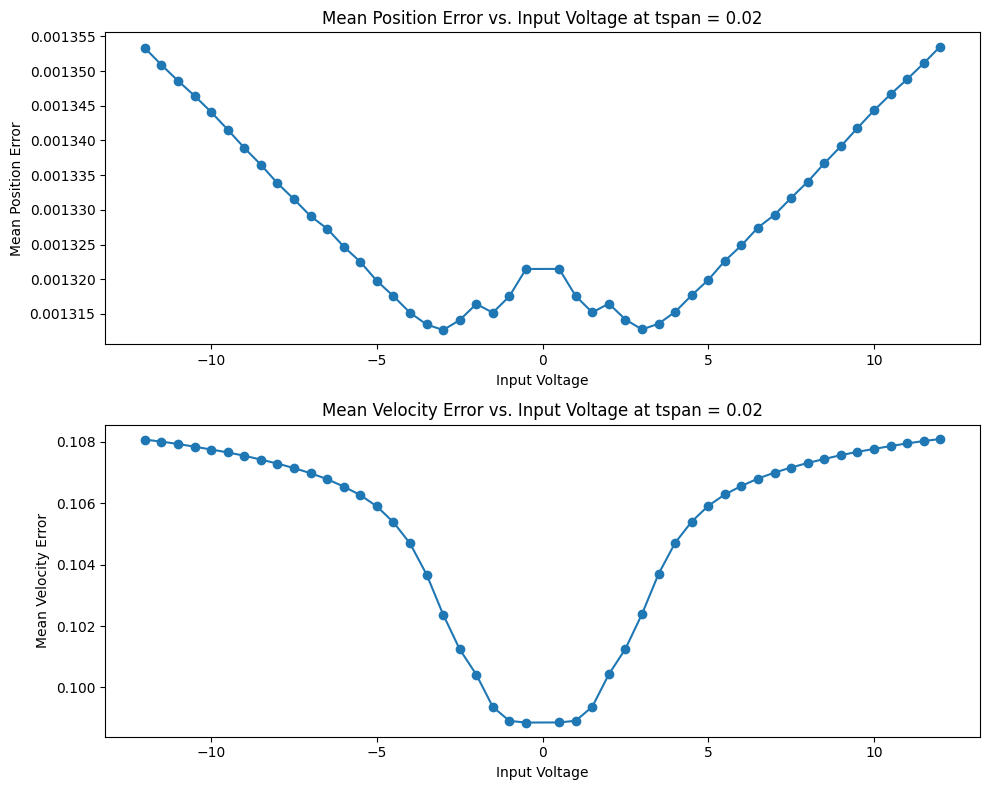

In [8]:
# Filter data for a specific tspan, e.g., tspan = 0.02
specific_tspan = 0.02
df_filtered = df[df['tspan'] == specific_tspan]

# Calculate error between nl_state and lin_state for position and velocity
df_filtered['position_error'] = df_filtered.apply(lambda row: abs(row['nl_state'][0] - row['lin_state'][0]), axis=1)
df_filtered['velocity_error'] = df_filtered.apply(lambda row: abs(row['nl_state'][1] - row['lin_state'][1]), axis=1)

# Group by input and calculate the mean of errors
error_summary = df_filtered.groupby('input').agg({
    'position_error': 'mean',
    'velocity_error': 'mean'
}).reset_index()

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Position Error Plot
ax[0].plot(error_summary['input'], error_summary['position_error'], marker='o', linestyle='-')
ax[0].set_title(f'Mean Position Error vs. Input Voltage at tspan = {specific_tspan}')
ax[0].set_xlabel('Input Voltage')
ax[0].set_ylabel('Mean Position Error')

# Velocity Error Plot
ax[1].plot(error_summary['input'], error_summary['velocity_error'], marker='o', linestyle='-')
ax[1].set_title(f'Mean Velocity Error vs. Input Voltage at tspan = {specific_tspan}')
ax[1].set_xlabel('Input Voltage')
ax[1].set_ylabel('Mean Velocity Error')

plt.tight_layout()
plt.show()
